# Exception Handling

1️⃣ Write Python code to read a number from the user and divide 100 by that number. Handle ZeroDivisionError and ValueError properly and print custom error messages.

In [1]:
try:
    num=int(input("Enter a number: "))
    divide= 100/num
    print(f"Result: {divide}")
except ZeroDivisionError:
    print("Error: Cannot divide by zero. Please enter a non-zero number.")
except ValueError:
    print("Error: Invalid input. Please enter a valid integer number.")

Result: 4.0


2️⃣ What is the purpose of the finally block in exception handling? Give an example where it makes sense to use finally.

3️⃣ Explain the difference between try-except and try-except-else.

Q1. Write a function that takes a list of numbers and returns their average.
Raise a ValueError if the list is empty.

In [2]:
def get_avg(num):
    if not num:
        raise ValueError("The list is empty. Cnnot calculate average")
    else:
        average=sum(num)/len(num)
        print(average)

get_avg([1,2,3,3,4,2,5,6])

3.25


Q2. Write code that opens a file and reads its content. If the file doesn’t exist, create it with some default text instead.

In [3]:
def file_opener(file_name,default_text="This file has no content"):
    try:
        with open(file_name,"r") as file:
            content=file.read()
    except FileNotFoundError:
        with open(file_name,"w") as file:
            file.write(default_text)
            content=file.read()
    return content

file_opener("test.txt")

'Success is not final, failure is not fatal: \nIt is the courage to continue that counts.\n\nâ€“ Winston Churchill'

# GUI (Tkinter)

4️⃣ Write a simple Tkinter GUI with:

A Label saying “Enter your name:”

An Entry box to take input

A Button which, when clicked, shows the input name in a pop-up messagebox.

In [4]:
import tkinter as tk
from tkinter import messagebox

def ShowName():
    name=entry_box.get()
    messagebox.showinfo("Your Name",f"Hello,{name}!")

frame= tk.Tk()
frame.title("What's Your Name?")
frame.geometry("400x400")

frame_label=tk.Label(frame,text="Enter Your Name")
frame_label.pack(pady=5)

entry_box=tk.Entry(frame)
entry_box.pack(pady=5)

entry_button=tk.Button(frame,text="Entry",command=ShowName)
entry_button.pack(pady=6)

frame.mainloop()

5️⃣ How do you change the background color of a Tkinter Frame? Write an example.

6️⃣ Suppose you want to close a Tkinter window after clicking a button. Write the button’s callback function to do this.

In [5]:
import tkinter as tk

def Close_Window():
    root.destroy()

root=tk.Tk()
root.title("Close Window Example")
root.geometry("400x400")

close_button=tk.Button(root,text="Close Window",command=Close_Window)
close_button.pack(pady=5)

root.mainloop()

Q3. Make a simple Tkinter window with:

A Label: “Enter two numbers:”

Two Entry boxes

A Button that, when clicked, adds the two numbers and shows the result in a Label.

In [6]:
import tkinter as tk
def add():
    try:
        num1=float(labelbox1.get())
        num2=float(labelbox2.get())
        result=num1+num2
        result_lbl.config(text=f"Result: {result}")
    except ValueError:
        result_lbl.config(text="Please enter valid numbers.")

frame=tk.Tk()
frame.title("Calculator")
frame.geometry("400x400")

frame_label=tk.Label(frame,text="Enter two numbers")
frame_label.pack(pady=5)

labelbox1=tk.Entry(frame)
labelbox1.pack(pady=3)

labelbox2=tk.Entry(frame)
labelbox2.pack(pady=7)

add_button=tk.Button(frame,text="+",command=add)
add_button.pack(pady=15)

result_lbl=tk.Label(frame,text="Result")
result_lbl.pack(pady=20)

frame.mainloop()

Q4. Make a Tkinter window with a Listbox showing 5 colors. When the user selects a color and clicks a button, the window’s background changes to that color.

In [9]:
import tkinter as tk

def change_bg_color():
    selected = listbox.curselection()
    if selected:
        color = listbox.get(selected)
        root.config(bg=color)

root = tk.Tk()
root.title("Color Selector")
root.geometry("300x200")

colors = ['red', 'green', 'blue', 'yellow', 'purple']

listbox = tk.Listbox(root, height=5)
for color in colors:
    listbox.insert(tk.END, color)
listbox.pack(pady=10)

button = tk.Button(root, text="Change Background", command=change_bg_color)
button.pack()

root.mainloop()

# Decorator

7️⃣ Explain what a decorator is in Python. Give an example of a function-based decorator that prints the execution time of any function.

8️⃣ How can you apply multiple decorators to a single function? Give a small example.

In [7]:
def decorator1(func):
    def wrapper():
        print("Decorator 1")
        func()
    return wrapper

def decorator2(func):
    def wrapper():
        print("Decorator 2")
        func()
    return wrapper

@decorator1
@decorator2
def greet():
    print("Hello!")

greet()

Decorator 1
Decorator 2
Hello!


9️⃣ Write a decorator that checks if the argument given to a function is an integer. If not, raise a TypeError.

In [8]:
def check_integer(func):
    def wrapper(arg):
        if not isinstance(arg,int):
            raise TypeError(f"Argument must be an integer, got {type(arg).__name__}")
        return func(arg)
    return wrapper

@check_integer
def Square(num):
    return num*num

print(Square(3.25))

TypeError: Argument must be an integer, got float

Q5. Write a decorator that logs before and after a function runs. Show its use with a simple function like multiply(a, b).

In [ ]:
class EmptyListError(Exception):
    def __init__(self,message):
        super().__init__(message)

class NonNumericError(Exception):
    def __init__(self,message):
        super().__init__(message)
    
class InvalidThresholdError(Exception):
    def __init__(self,message):
        super().__init__(message)

class TemperatureOutOfRangeError(Exception):
    def __init__(self,message):
        super().__init__(message)

def processSensorData(temperatures, threshold):
    if not temperatures:
        raise EmptyListError("Temperature list must not be empty.")
    
    if not isinstance(threshold, int):
        raise InvalidThresholdError("Threshold must be an integer.")
    
    for temp in temperatures:
        if not isinstance(temp, (int, float)):
            raise NonNumericError("All temperatures must be numbers.")
        if temp < -100 or temp > 100:
            raise TemperatureOutOfRangeError("Temperature out of allowed range (-100 to 100).")
    
    result = [temp for temp in temperatures if temp > threshold]
    return result

In [ ]:
import time
import threading

class time_limit:
    def __init__(self, seconds):
        self.seconds = seconds

    def __call__(self, func):
        def wrapper(*args, **kwargs):
            result = [None]

            def run():
                result[0] = func(*args, **kwargs)

            thread = threading.Thread(target=run)
            thread.start()
            thread.join(self.seconds)

            if thread.is_alive():
                print("Time limit exceeded.")
                return None
            else:
                return result[0]
        return wrapper

@time_limit(2)
def long_task():
    time.sleep(3)
    print("Done!")

long_task()

Time limit exceeded.


Done!


In [4]:
def EVE(n):
    for i in range(n):
        if i%2==0:
            yield i

eve=EVE(10)
for num in eve:
    print(num)

0
2
4
6
8


# Pandas

🔟 Load a CSV file named students.csv with columns: Name, Age, Marks. Write Pandas code to:

Show the first 5 rows.

Filter students who scored more than 80 marks.

Add a new column Grade where Marks > 80 = ‘A’, else ‘B’.

In [ ]:
import pandas as pd

df=pd.read_csv("Book1.csv")

print("The First 5 Row")
print(df.head())
print()

print("Those Who Get Over 80")
high_score=df[df["Marks"]>80]
print(high_score)
print()

df['Grade'] = df['Marks'].apply(lambda x: 'A' if x > 80 else 'B')
print(df)

The First 5 Row
      Name  Age  Marks
0    Alice   20     85
1      Bob   21     78
2  Charlie   19     92
3    David   22     67
4      Eva   20     88

Those Who Get Over 80
       Name  Age  Marks
0     Alice   20     85
2   Charlie   19     92
4       Eva   20     88
6     Grace   21     81
7    Hannah   20     95
9     Julia   19     89
10     Akil   21     85
12     John   20     92
14      Ali   21     81
16     Ravi   22     88
18     Zara   20     95

       Name  Age  Marks Grade
0     Alice   20     85     A
1       Bob   21     78     B
2   Charlie   19     92     A
3     David   22     67     B
4       Eva   20     88     A
5     Frank   23     75     B
6     Grace   21     81     A
7    Hannah   20     95     A
8       Ian   22     60     B
9     Julia   19     89     A
10     Akil   21     85     A
11     Sara   22     78     B
12     John   20     92     A
13     Lina   23     67     B
14      Ali   21     81     A
15     Tina   20     55     B
16     Ravi   22     88 

1️⃣1️⃣ Explain the difference between loc and iloc with examples.

In [ ]:
print(df.loc[0, 'Name'])
print(df.iloc[0, 0])

Alice
Alice


1️⃣2️⃣ What is the output of df.groupby('Department').mean() if df has columns Department and Salary? Explain how groupby works.

In [ ]:
data = {
    'Department': ['CS', 'CS', 'Math', 'Math'],
    'Salary': [50000, 60000, 55000, 65000]
}
df = pd.DataFrame(data)
print(df.groupby('Department').mean())

             Salary
Department         
CS          55000.0
Math        60000.0


# Matplotlib

1️⃣3️⃣ Write Python code to plot a simple line chart of x = [1, 2, 3, 4] and y = [2, 4, 6, 8]. Add title, xlabel, and ylabel.

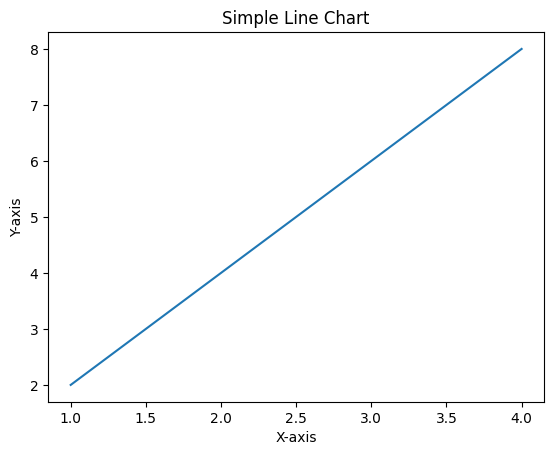

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

plt.plot(x, y)
plt.title("Simple Line Chart")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


1️⃣4️⃣ How do you create a bar chart with custom colors and labels? Give an example.

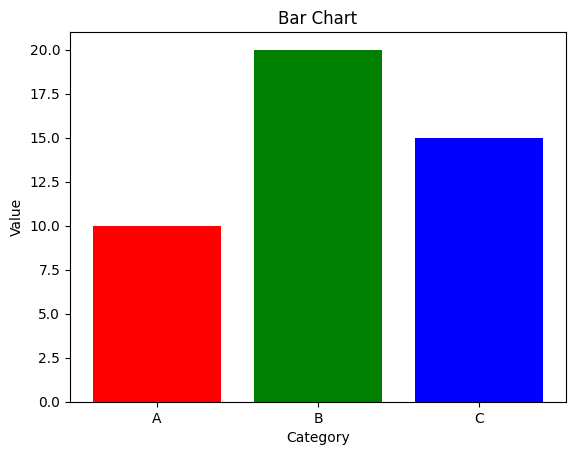

In [ ]:
import matplotlib.pyplot as plt

categories = ['A', 'B', 'C']
values = [10, 20, 15]

plt.bar(categories, values, color=['red', 'green', 'blue'])
plt.title("Bar Chart")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()


1️⃣5️⃣ What does plt.subplot() do? Write code to plot 2 plots side by side using subplot.

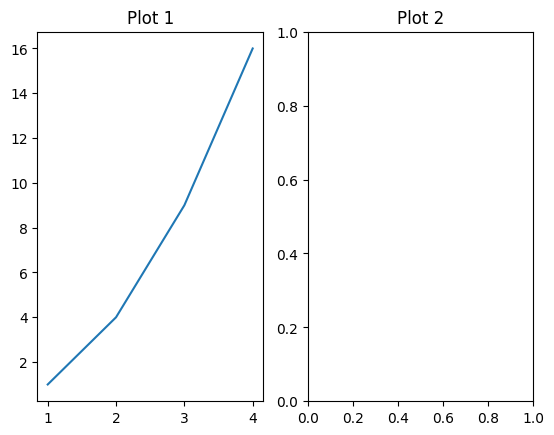

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y1 = [1, 4, 9, 16]
y2 = [2, 3, 4, 5]

plt.subplot(1, 2, 1)
plt.plot(x, y1)
plt.title("Plot 1")

plt.subplot(1, 2, 2)
plt.title("Plot 2")

plt.show()

# Generator

1️⃣6️⃣ Explain what a generator is. How is it different from a normal function?

In [ ]:
def simple_gen():
    yield 1
    yield 2
    yield 3

g = simple_gen()
print(next(g))
print(next(g))

1
2



1️⃣7️⃣ Write a generator function to yield all even numbers from 1 to N.

In [ ]:
def even_numbers(n):
    for i in range(1, n+1):
        if i % 2 == 0:
            yield i

for num in even_numbers(10):
    print(num)

2
4
6
8
10



1️⃣8️⃣ What is the benefit of using a generator when handling large data? Give an example scenario related to data science.

In [ ]:
def read_large_file(file_name):
    with open(file_name) as f:
        for line in f:
            yield line

for line in read_large_file('huge_file.txt'):
    print(line.strip())

FileNotFoundError: [Errno 2] No such file or directory: 'huge_file.txt'

# Bonus Mixed Question

1️⃣9️⃣ Combine exception handling + file reading + generator:

Write a function that reads a large text file line by line using a generator, and handle the FileNotFoundError if the file does not exist.

In [ ]:
def read_file_lines(filename):
    try:
        with open(filename) as f:
            for line in f:
                yield line.strip()
    except FileNotFoundError:
        print("Error: File not found.")

for line in read_file_lines('test.txt'):
    print(line)